In [3]:
import pyactup as pau
import random
from copy import copy
import math
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import seaborn as sns
sns.set_style("whitegrid")

# Pavlik & Anderson's (2005) Spacing Model

To account for the spacing effect, Pavlik and Anderson (2005) introduced a modification to the decay term $d$. Specifically, they relaxed the constrained that $d$ is constant across all traces, and allow for every trace to have its own specific decay term $d_i$:

\begin{equation}
    A(m, t) = \sum_i (t - t_j)^{d_i}
\end{equation}

The trace-specific term $d_i$ depends on the current value of the activation $A(m, t=t_i)$ at the moment in which the trace was created. Thus, when the $i$-th trace is created, it is given a decay rate $d_i$ calculated as follows:

\begin{equation}
    d_i = c~\textrm{e}^{A(m, t = t_i)} + \phi
\end{equation}


where  $A(m, t = t_i)$ represents the activation of $m$ at time $t_i$. The spacing effect is made possible by including the term $c~\textrm{e}^{A(m, t = t_i)}$ in the computation of the decay rate. When two traces are temporally close together, the corresponding memory's activation at the moment the second trace is encoded is higher, resulting in a larger value of $c~\textrm{e}^{B(m, t = t_i)}$ and, therefore, a larger decay rate for the second trace.

Note that, even when allowing for different traces to decay at different rates, decay is still determined by a single parameter, $\phi$.

The final, complete model is noteworthy for its reliability, having been used to successfully model a variety of memory results and having been used to successfully derive optimal schedules for learning practice. The rate of forgetting $\alpha$ has been also used as an idiographic (i.e., person-specific) parameter, with $\alpha$ remaining a stable and reliable trait within the same individual across sessions and materials, and to assess individual differences in real-life outcomes, such as a student’s success at answering test questions after studying.

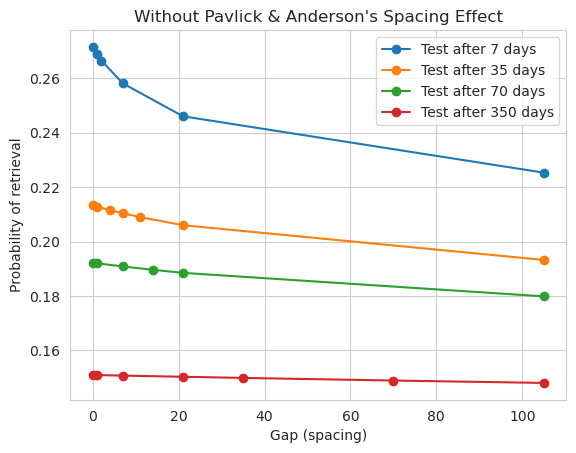

In [4]:
from math import log
from math import exp


# Cepeda's experiment design
design = {7 : [0.002, 1, 2, 7, 21, 105],
         35 : [0.002, 1, 4, 7, 11, 21, 105],
         70 : [0.002, 1, 7, 14, 21, 105],
         350 : [0.002, 1, 7, 21, 35, 70, 105]}


# Convert days into seconds
daysec =  60*60*24
d = .15

results = {}

for ri in design.keys():
    ri_results = []
    gaps = design[ri]
    for gap in gaps:
        risec = ri * daysec
        gapsec = gap * daysec
        t = (ri + gap)*daysec
        t1 = 0
        t2 = gapsec
        odds1 = (t - t1)**-d
        odds2 = (t - t2)**-d 
        odds = odds1 + odds2
        prob = odds / (odds + 1)
        ri_results.append(odds)
    results[ri] = ri_results


for ri in design.keys():
    x = design[ri]
    y = results[ri]
    plt.plot(x, y, "o-")
plt.legend(labels=["Test after %d days" % (x,) for x in design.keys()])
plt.xlabel("Gap (spacing)")
plt.ylabel("Probability of retrieval")
plt.title("Without Pavlick & Anderson's Spacing Effect")
plt.show()

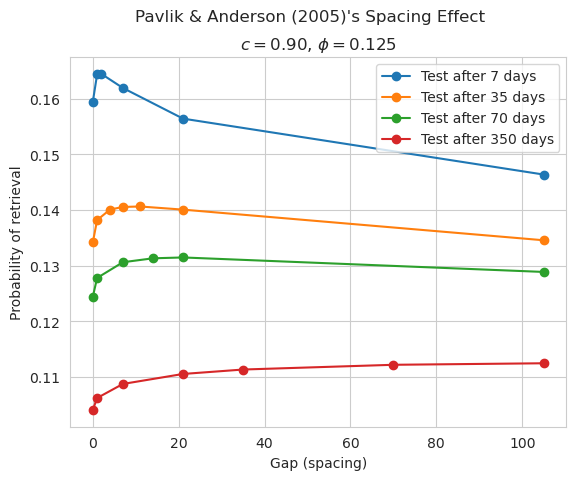

In [39]:
results = {}
d = 0.125
c = 0.9
for ri in design.keys():
    ri_results = []
    gaps = design[ri]
    for gap in gaps:
        risec = ri * daysec
        gapsec = gap * daysec
        t = (ri + gap)*daysec
        t1 = 0
        t2 = gapsec
        odds1 = (t - t1)**-d
        prob1 = odds1 / (odds1 + 1)
        
        d2 = 0.9 * t2**-d + d
        
        odds2 = (t - t2)**-d2 
        odds = odds1 + odds2
        prob = odds / (odds + 1)
        ri_results.append(prob)
    results[ri] = ri_results


for ri in design.keys():
    x = design[ri]
    y = results[ri]
    plt.plot(x, y, "o-")
plt.legend(labels=["Test after %d days" % (x,) for x in design.keys()])
plt.xlabel("Gap (spacing)")
plt.ylabel("Probability of retrieval")
plt.suptitle("Pavlik & Anderson (2005)'s Spacing Effect")
plt.title("$c = %.2f$, $\phi = %.3f$" % (c, d))
plt.show()

# Alternative Model Based on Free Energy 

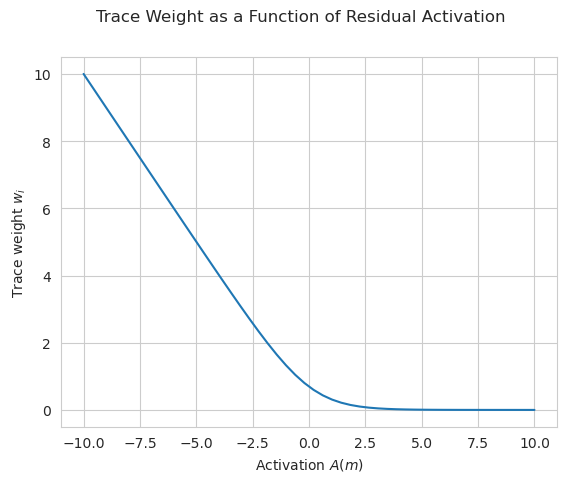

In [47]:
Am = np.linspace(-10, 10)
weights = np.log(1 + np.exp(Am)) - Am

plt.plot(Am, weights)
plt.xlabel("Activation $A(m)$")
plt.ylabel("Trace weight $w_i$") 
plt.suptitle("Trace Weight as a Function of Residual Activation") 
plt.show()

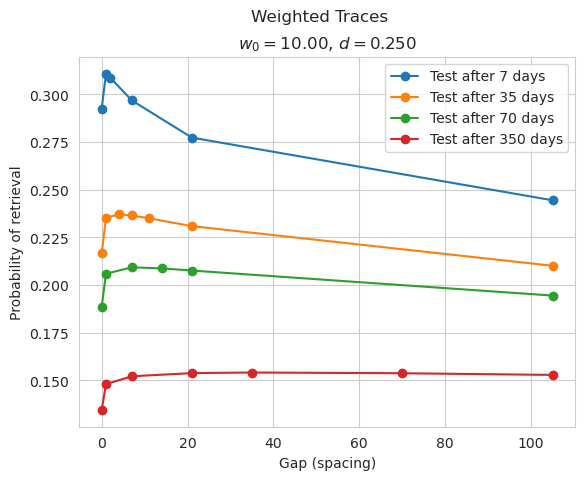

In [48]:
results = {}

d = 0.25
w_default = 10

for ri in design.keys():
    ri_results = []
    gaps = design[ri]
    for gap in gaps:
        risec = ri * daysec
        gapsec = gap * daysec
        t1 = 0
        t2 = gapsec
        t3 = risec + gapsec
        
        # Traces
        
        trace1 = (t3 - t1)**-d  # Trace 1 at time t
        trace2 = (t3 - t2)**-d  # Trace 2 at time t 
        
        # Weights
        
        w1 = w_default 
        
        A_t2 = log((t2 - t1)**-d)
        w2 = log(1 + exp(A_t2)) - A_t2
                
        A_t = log(w1 * trace1 + w2 * trace2)
        prob = exp(A_t) / (1 + exp(A_t))
        ri_results.append(prob)
    results[ri] = ri_results


for ri in design.keys():
    x = design[ri]
    y = results[ri]
    plt.plot(x, y, "o-")
    
plt.legend(labels=["Test after %d days" % (x,) for x in design.keys()])
plt.xlabel("Gap (spacing)")
plt.ylabel("Probability of retrieval")
plt.suptitle("Weighted Traces")
plt.title("$w_0 = %.2f$, $d = %.3f$" % (w_default, d))
plt.show()

## Spacing by unobserved retrievals

/tmp/ipykernel_151814/980766772.py:3: RuntimeWarning: divide by zero encountered in power
  odds = T**d
/tmp/ipykernel_151814/980766772.py:4: RuntimeWarning: invalid value encountered in true_divide
  probs = odds/(1 + odds)


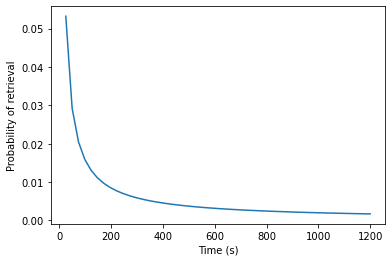

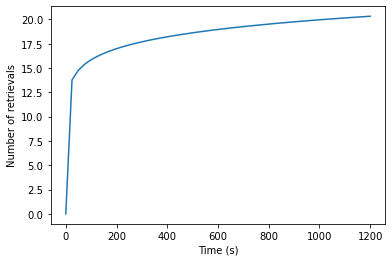

In [19]:
T = np.linspace(0, 1200)
d = -0.9
odds = T**d
probs = odds/(1 + odds)
plt.plot(T, probs)
plt.xlabel("Time (s)")
plt.ylabel("Probability of retrieval")
plt.show()

cmvl = (T**(d + 1)) / (d + 1)
plt.plot(T, cmvl)
plt.xlabel("Time (s)")
plt.ylabel("Number of retrievals")
plt.show()

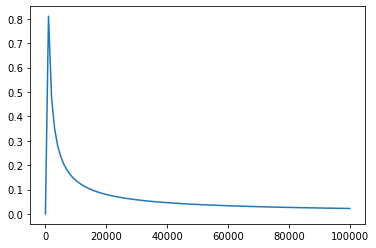

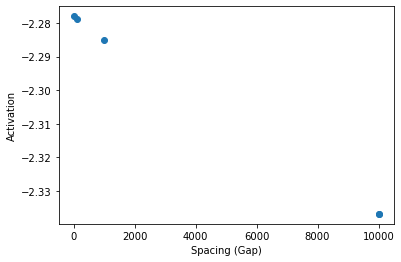

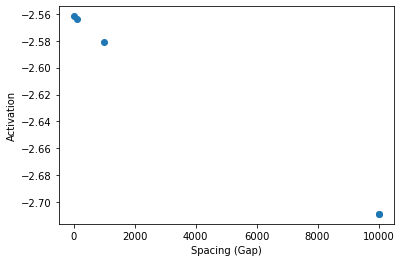

In [99]:
def new_trace_odds(t, d=-0.4):
    X = np.linspace(0, t, endpoint=False)    
    integral = 0
    for x in X:
        if (x > 0):
            odds = x ** d
            prob = odds / (1 + odds)
            integral += prob * ((t-x)**d)
    return integral
        

def old_trace_odds(t, d=-0.3):
    return t ** d
    
res = []
T = np.linspace(0, 100000, 100)
for i in T:
    res += [real_trace_odds(i)]
plt.plot(T, res)
plt.show()

gaps = [10, 100, 1000, 10000, 10000]
retention = 20000

old = []
for gap in gaps:
    endtime = gap + retention
    t1 = old_trace_odds(endtime)
    t2 = old_trace_odds(retention)
    activation = np.log(t1 + t2)
    old += [activation]
    
plt.plot(gaps, old, "o")
plt.xlabel("Spacing (Gap)")
plt.ylabel("Activation")
plt.show()

new = []
for gap in gaps:
    endtime = gap + retention
    t1 = new_trace_odds(endtime)
    t2 = new_trace_odds(retention)
    activation = np.log(t1 + t2)
    new += [activation]

plt.plot(gaps, new, "o")
plt.xlabel("Spacing (Gap)")
plt.ylabel("Activation")
plt.show()

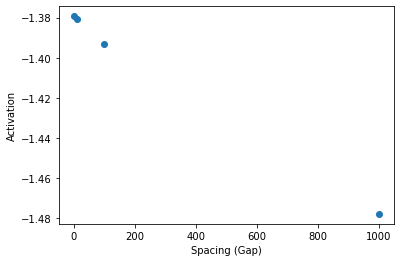

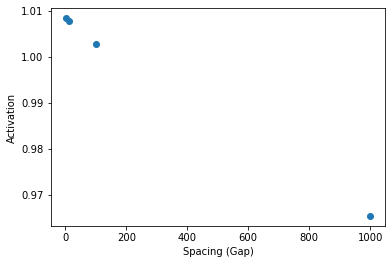

In [100]:
def estimated_number_retrievals(t, d=-0.8):
    """This is the anti-derivative of the odds function"""
    return t**(d + 1) / (d + 1) 
    
    
def cumulative_trace_odds(t, d=-0.8):
    """Real effect of a trace, assuming N retrievals were spawned"""
    n = estimated_number_retrievals(t, d)
    return np.log(n / (1 + d)) + d * np.log(t)


gaps = [1, 10, 100, 1000]
retention = 1000

old = []
for gap in gaps:
    endtime = gap + retention
    t1 = old_trace_odds(endtime)
    t2 = old_trace_odds(retention)
    activation = np.log(t1 + t2)
    old += [activation]
    
plt.plot(gaps, old, "o")
plt.xlabel("Spacing (Gap)")
plt.ylabel("Activation")
plt.show()

new = []
for gap in gaps:
    endtime = gap + retention
    n1 = estimated_number_retrievals(endtime)
    n2 = estimated_number_retrievals(retention)
    activation = cumulative_trace_odds(n1 + n2)
    new += [activation]

plt.plot(gaps, new, "o")
plt.xlabel("Spacing (Gap)")
plt.ylabel("Activation")
plt.show()



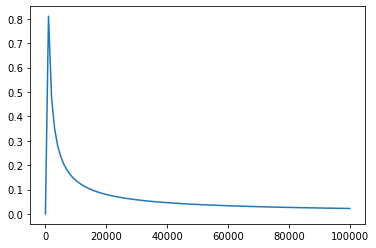

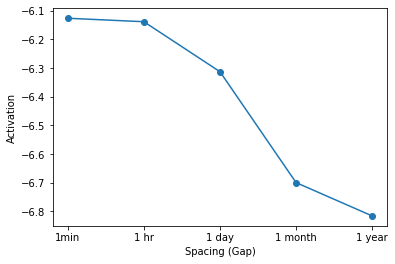

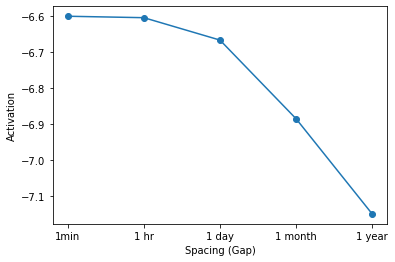

In [149]:
# The mean of a poisson distribution is lambda, which
# is approximated as 
#   
#     lambda = r*t
#
# where r = rate of events per time unit
#       t = duration of the interval

rate = 1 / (60 * 10)

def cumulative_traces(t, d=-0.6):
    X = np.linspace(0, t, 1000, endpoint=False)    
    integral = 0
    previous = 0
    for x in X:
        if (x > 0):
            odds = x ** d
            prob = odds / (1 + odds)
            echoes = prob * rate * (x - previous)
            previous = x
            integral += echoes * (t - x)**d
    return integral 



def old_trace_odds(t, d=-0.6):
    return t ** d
    
res = []
T = np.linspace(0, 100000, 100)
for i in T:
    res += [real_trace_odds(i)]
plt.plot(T, res)
plt.show()

gaps = [10, 60 * 60, 60 * 60 * 24, 60 * 60 * 24 * 30, 60 * 60 * 24 * 30 * 365]
gap_names = ["1min", "1 hr", "1 day", "1 month", "1 year"]
retention = 60 * 60 * 24

old = []
for gap in gaps:
    endtime = gap + retention
    t1 = old_trace_odds(endtime)
    t2 = old_trace_odds(retention)
    activation = np.log(t1 + t2)
    old += [activation]
    
plt.plot(gap_names, old, "-o")
plt.xlabel("Spacing (Gap)")
plt.ylabel("Activation")
plt.show()

new = []
for gap in gaps:
    endtime = gap + retention
    t1 = cumulative_traces(endtime)
    t2 = cumulative_traces(retention)
    activation = np.log(t1 + t2)
    new += [activation]

plt.plot(gap_names, new, "-o")
plt.xlabel("Spacing (Gap)")
plt.ylabel("Activation")
plt.show()


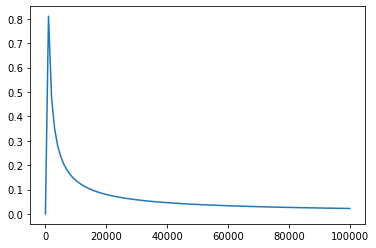

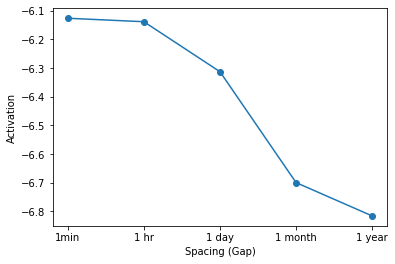

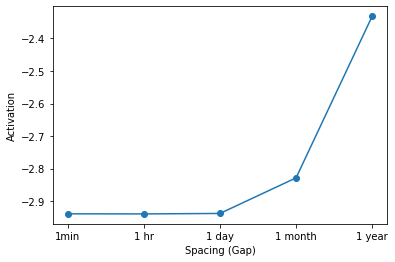

In [160]:
# Now, teh full might, with integral over echoes of echoes of echoes

rate = 1 / (60 * 10)

def cumulative_traces(t, d=-0.43):
    X = np.linspace(0, t, endpoint=False)    
    integral = 0
    previous = 0
    echoes = [1]
    current_odds = 0
    for x in X:
        if x > 0:
            odds = x ** d
            prob = odds / (1 + odds) # probability of the original trace
            newechoes = prob * rate * (x - previous) # new echoes of the original trace
            previous = x
            echoes += [newechoes]
    
    for x, n in zip(X, echoes):
        integral += n * (t - x)**d
    
    return integral 



def old_trace_odds(t, d=-0.6):
    return t ** d
    
res = []
T = np.linspace(0, 100000, 100)
for i in T:
    res += [real_trace_odds(i)]
plt.plot(T, res)
plt.show()

gaps = [10, 60 * 60, 60 * 60 * 24, 60 * 60 * 24 * 30, 60 * 60 * 24 * 30 * 365]
gap_names = ["1min", "1 hr", "1 day", "1 month", "1 year"]
retention = 60 * 60 * 24

old = []
for gap in gaps:
    endtime = gap + retention
    t1 = old_trace_odds(endtime)
    t2 = old_trace_odds(retention)
    activation = np.log(t1 + t2)
    old += [activation]
    
plt.plot(gap_names, old, "-o")
plt.xlabel("Spacing (Gap)")
plt.ylabel("Activation")
plt.show()

new = []
for gap in gaps:
    endtime = gap + retention
    t1 = cumulative_traces(endtime)
    t2 = cumulative_traces(retention)
    activation = np.log(t1 + t2)
    new += [activation]

plt.plot(gap_names, new, "-o")
plt.xlabel("Spacing (Gap)")
plt.ylabel("Activation")
plt.show()
